Text(0.5, 1, 'Autoregressive Process')

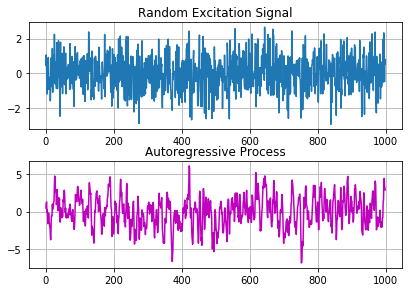

In [2]:
#1, Generating a Second Order Autoregressive Process
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Length of time series
#
N=1000
# Gaussian random numbers as an excitation
#
ex = np.random.randn(N)
# Second order AR Process
#
a = np.array([1.2, -0.4])
S = ex.copy();
for n in range(2, N):
    x = np.array([S[n-1], S[n-2]])
    S[n] = np.dot(x, a) + ex[n]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,4))
plt.tight_layout()
ax[0].plot(range(N), ex)
ax[0].grid(True)
ax[0].set_title("Random Excitation Signal")
ax[1].plot(range(N), S, color='m')
ax[1].grid(True)
ax[1].set_title("Autoregressive Process")

initial th_n1_n1: 
 [[-1.032]
 [ 0.948]]
initial P_n1_n1: 
 [[0.001 0.   ]
 [0.    0.001]]
R: 
 0.16273041534545504
Q: 
 [[0.0009 0.    ]
 [0.     0.0009]]
a: 
 [ 1.2 -0.4]
th_n_n: 
 [[ 1.19264325]
 [-0.26939047]]


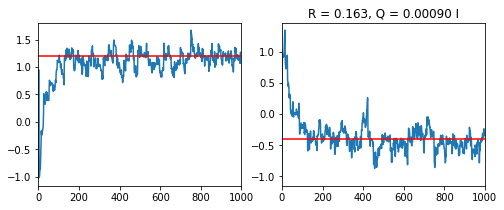

In [19]:
#1, Kalman Filter Estimates of second order AR parameters

# Time series data y
y=S
# th_n_n: estimate at time n using all data upto time n
# th_n_n1: estimate at time n using all data upto time n-1

# Initialize
x = np.zeros((2,1)) #Return a 2×1 array, filled with zeros.
#th_n1_n1 = np.random.randn(2,1) #Return a 2×1 sample (or samples) from the “standard normal” distribution.
th_n1_n1=np.array([[-1.032],[0.948]])
P_n1_n1 = 0.001*np.eye(2) #Return a 2×2 array with 1s on the diagonal and zeros elsewhere.
print('initial th_n1_n1: \n',th_n1_n1)
print('initial P_n1_n1: \n',P_n1_n1)
# Noise variances -- hyperparameters (to be tuned)
# Set measurement noise as fraction of data variance (first few samples)
# Guess for process noise
R = 0.2*np.std(ex[0:10]) #scalar
beta = 0.0009
Q = beta*np.eye(2) #Return a 2×2 array with betas on the diagonal and zeros elsewhere.
print('R: \n',R)
print('Q: \n',Q)

# Space to store and plot
th_conv = np.zeros([2, N]) #Return a 2×N array, filled with zeros.
# First two estimates are initial guesses
th_conv[0,0] = th_n1_n1[0]
th_conv[0,1] = th_n1_n1[1]
th_conv[1,0] = th_n1_n1[0]
th_conv[1,1] = th_n1_n1[1]

# Kalman Iteration Loop (univariate observation, start from time step 2)
for n in range(2, N):
    # Input vector contains past values
    x[0] = y[n-1]
    x[1] = y[n-2]
    
    # Prediction of state and covariance
    th_n_n1 = th_n1_n1.copy()
    P_n_n1 = P_n1_n1 + Q
    
    yh = th_n_n1.T @ x #scalar
    en = y[n] - yh #scalar
    #ePlot[n] = en
    
    # Kalman gain (kn) and innovation variance (den)
    den = x.T @ P_n_n1 @ x + R #scalar
    kn = P_n_n1 @ x / den #2×1
    
    # Posterior update
    th_n_n = th_n_n1 + kn * en
    P_n_n = (np.eye(2) - kn @ x.T) @ P_n_n1
    
    # Save
    th_conv[0,n] = th_n_n[0]
    th_conv[1,n] = th_n_n[1]
    
    # Remember for next step
    th_n1_n1 = th_n_n.copy()
    P_n1_n1 = P_n_n.copy()

print('a: \n',a)
print('th_n_n: \n',th_n_n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
ax[0].plot(th_conv[0])
ax[0].set_xlim(0,1000)
ax[0].axhline(y=a[0], color='r')

ax[1].plot(th_conv[1])
ax[1].set_xlim(0,1000)
ax[1].axhline(y=a[1], color='r')
ax[1].set_title("R = %4.3f, Q = %6.5f I"%(R, beta))

plt.savefig("C:\\Users\\zhoujie\\Desktop\\0.0009I.png")

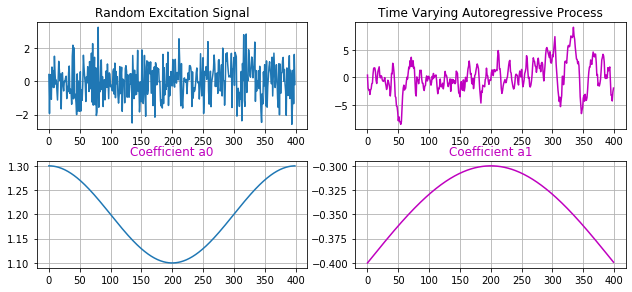

In [67]:
#2, Generating a Time-varying AR process
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Length of time series
N=400

# Gaussian random numbers as an excitation signal
ex = np.random.randn(N)

# Second order AR Process with coefficients slowly changing in time--Non linear
a0 = np.array([1.2, -0.4])
A = np.zeros((N,2))
omega, alpha = N/2, 0.1
for n in range(N):
    A[n,0] = a0[0] + alpha * np.cos(2*np.pi*n/N)
    A[n,1] = a0[1] + alpha * np.sin(np.pi*n/N)
S = ex.copy();
for n in range(2, N):
    x = np.array([S[n-1], S[n-2]])
    S[n] = np.dot(x, A[n,:]) + ex[n]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,4))
plt.tight_layout()
ax[1,0].plot(range(N), A[:,0])
ax[1,0].grid(True)
ax[1,0].set_title("Coefficient a0", color='m')
ax[1,1].plot(range(N), A[:,1], color='m')
ax[1,1].grid(True)
ax[1,1].set_title("Coefficient a1", color='m')
ax[0,0].plot(range(N), ex)
ax[0,0].grid(True)
ax[0,0].set_title("Random Excitation Signal")
ax[0,1].plot(range(N), S, color='m')
ax[0,1].grid(True)
ax[0,1].set_title("Time Varying Autoregressive Process")
plt.savefig("arChange.png")

C:\Users\zhoujie\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\zhoujie\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


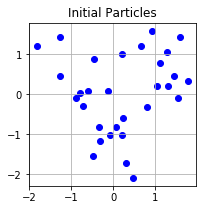

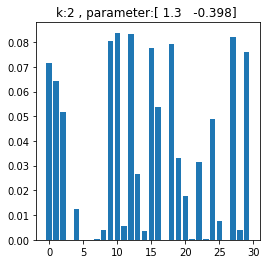

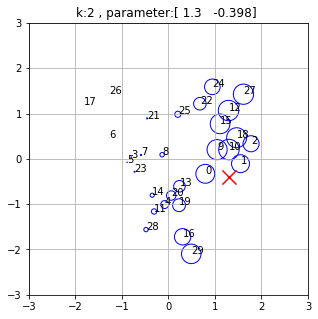

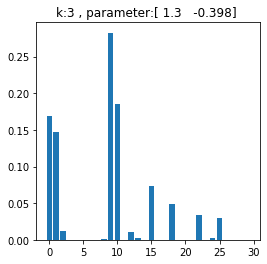

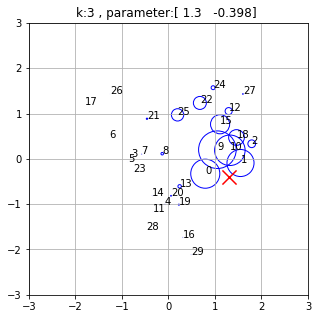

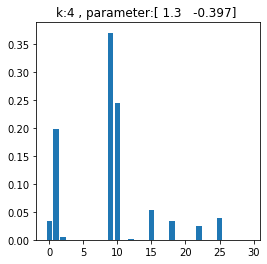

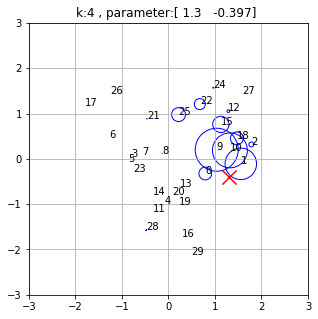

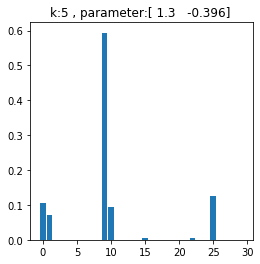

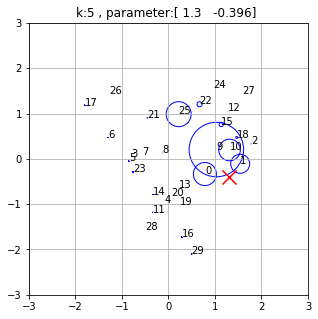

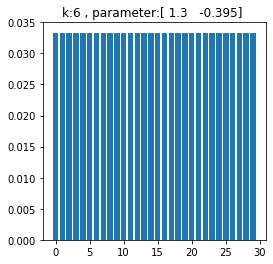

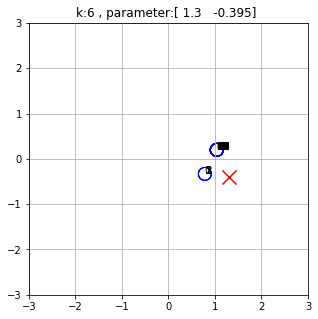

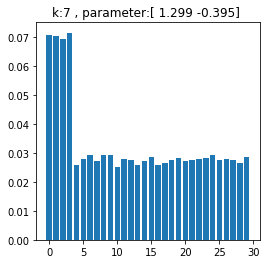

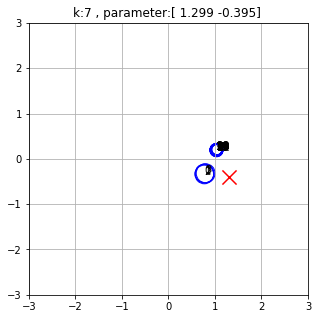

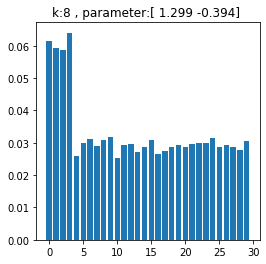

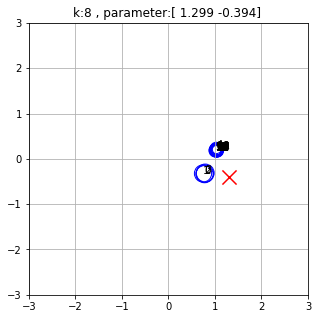

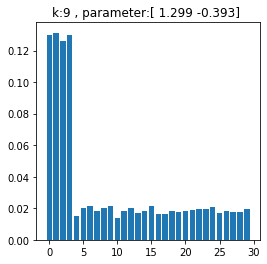

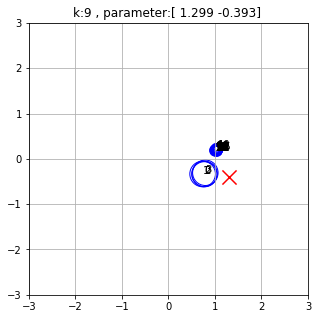

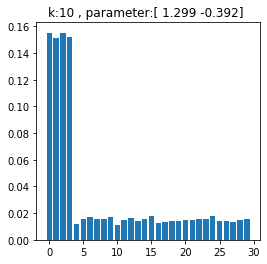

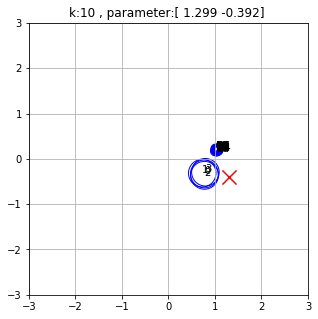

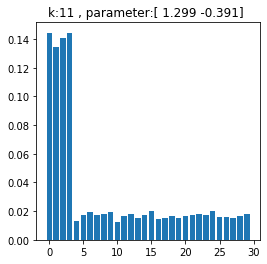

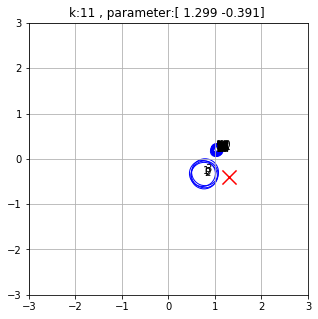

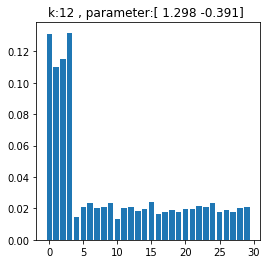

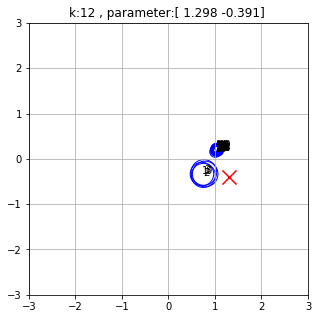

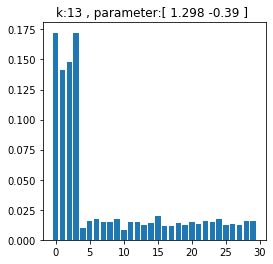

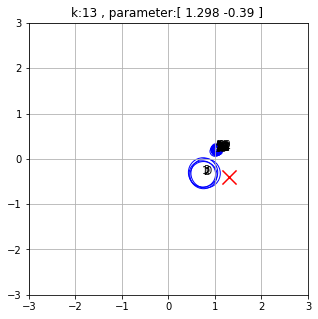

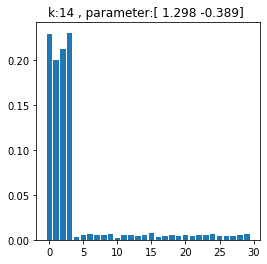

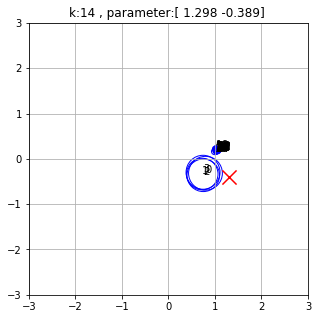

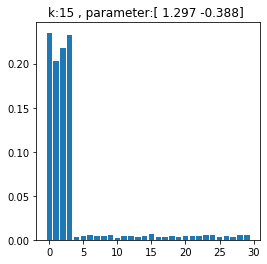

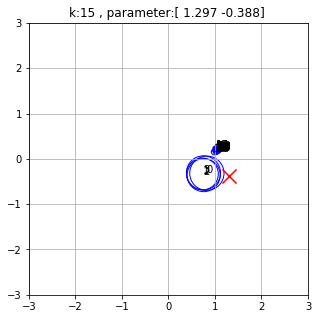

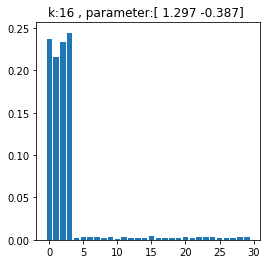

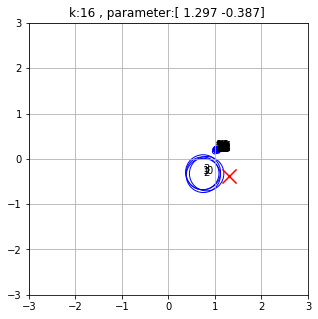

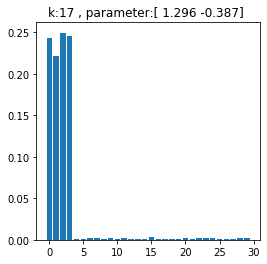

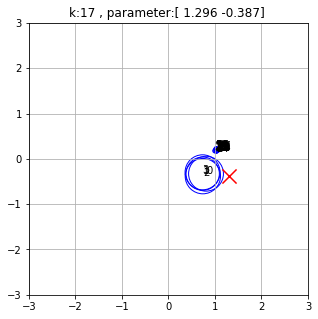

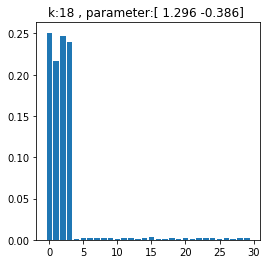

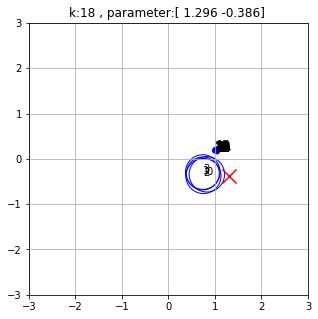

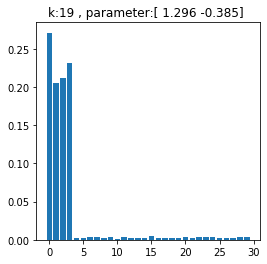

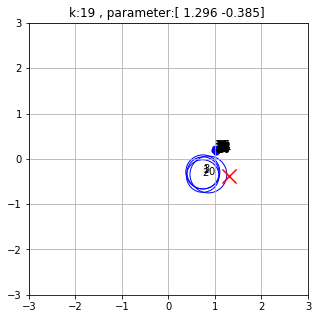

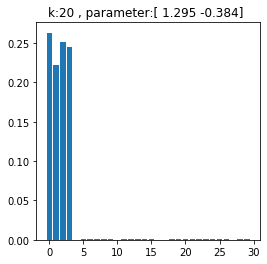

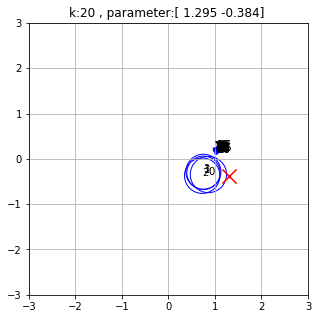

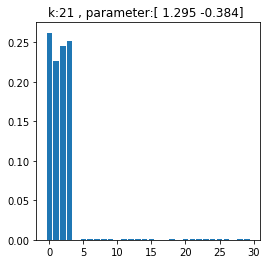

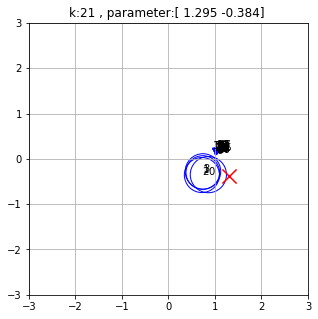

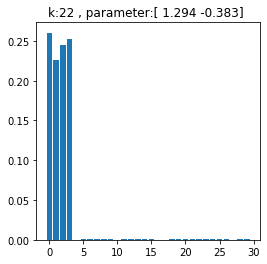

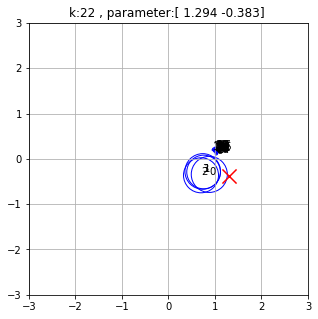

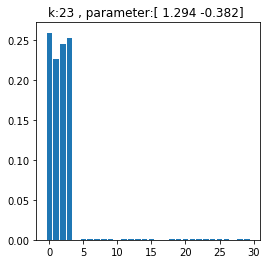

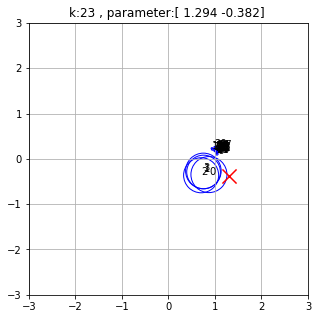

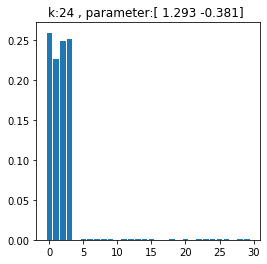

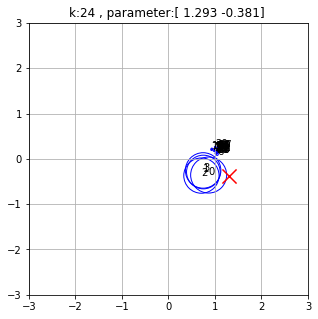

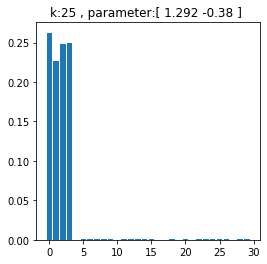

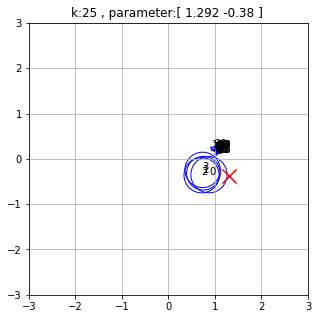

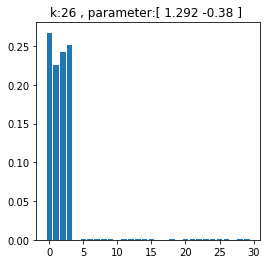

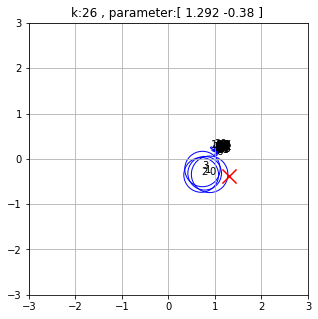

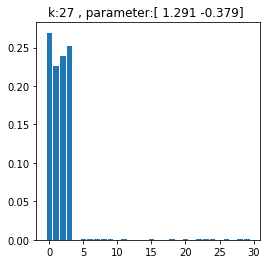

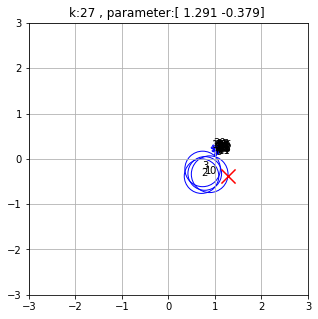

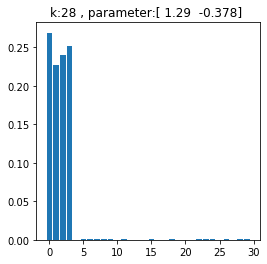

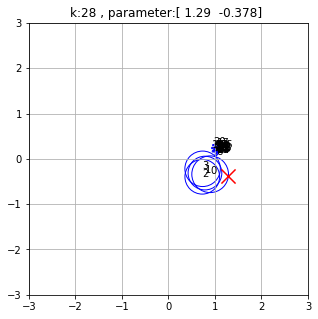

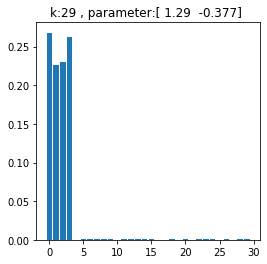

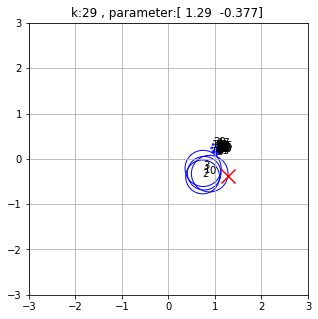

In [68]:
#2, Partile Filter Estimates of second order AR parameters
#A distribution of random particles in 2D
Ns = 30

# Initial particles
parts = np.random.randn(Ns, 2) #Ns particles represented by a Ns ×2 matrix, draw from “standard normal” importance sampling distribution
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(parts[:,0], parts[:,1], color='b')
ax.grid(True)
ax.set_title("Initial Particles")

#Algorithm 1: Sequential Monte Carlo

# Likelihood from Gaussian noise
# Needs estimate, true value and noise variance
def particle_likelihood(y0, yh, sig):
    # the likelihood is the probability of observation given by state p(z|x). according to the observation equation(2nd order 
    # AR model): observation=x.T @ th+ex[n],the 2nd term on the right is the observation noise and it's from Gaussian distribution,
    # the 1st term on the right is a constant, so the term on the left,i.e, the likelihood is still Gaussian distribution.
    lhood = (1/(2*np.pi*sig))*np.exp(-0.5*((y0-yh)/sig)**2) 
    # since the constant doesn't affect the relative weights between particles, the
    # square root of 2π in the original Gaussian pdf can be omitted
    return lhood

# Process noise covariance is beta*I
beta = 0.01

# Observation noise variance
sig = np.std(ex) #sigma: the standard deviation of excitation signal

# Initial input vector and particle weights
x = np.zeros((2,1)) #Return a new array of 2×1, filled with zeros.
pweights = np.ones((Ns,1)) / Ns #Return a new array of Ns×1, filled with 1/Ns.

# Go over the data
for n in range(2, 30):
    x[0] = S[n-1]
    x[1] = S[n-2]
    
    # 1, Sample particles from the prior---transition probability: x_k=x_k-1+w_k-1
    # equation(63) from A Tutorial on Particle Filters for Online Nonlinear/Non-Gaussian Bayesian Tracking
    # (in the simplest case here, random perturbation)
    for p in range(Ns):
        parts[p,:] = parts[p,:] + beta*np.random.randn(1,2) #each particle: a 1×2 vector
    
    
    # 2, Assign the particle a weight
    # Predictions and likelihoods
    sh = np.zeros((Ns, 1))# return a array of Ns×1, filled with zeros 
    lhoods = sh.copy() # the list of likelihoods of particles
    for particle in range(Ns):
        th = parts[particle,:].T.copy() # the transpose of a particle: a 2×1 vector
        sh[particle] = x.T @ th # the multiplication is a scalar
        #the likelihood of each particle,is derived from the observation equation
        #S[n]=sh[particle]+ex[n]=x.T @ th+ex[n]
        lhoods[particle] = particle_likelihood(S[n], sh[particle], sig) 
    
    # multiply prior weigts by likelihoods and normalize    
    # equation(63) from A Tutorial on Particle Filters for Online Nonlinear/Non-Gaussian Bayesian Tracking
    pweights = pweights * lhoods #a array of Ns×1: element-wise product between two vectors
    pweights = pweights / np.sum(pweights) #normalization
    
    # 3, Resampling
    N_eff=1/sum(map(lambda x:x*x,pweights)) #the effective sample size
    if N_eff<2:
        # construct a CDF
        CDF={1:pweights[0].item()}
        #CDF={1:0}
        for i in range(1,Ns):
            CDF.update({i+1:np.cumsum(pweights)[i]})
            #CDF.update({i+1:np.cumsum(pweights)[i]-pweights[0].item()})
        i=1
        u1=np.random.uniform(0,1/Ns)
        for j in range(1,Ns+1):
            uj=u1+(j-1)/Ns
            while uj>CDF[i]:
                i=i+1
            parts[j-1,:]=parts[i-1,:] #assign sample
            pweights[j-1]=1/Ns #assign weight
            ij=i #assign parent    

        
    # Observe how the weights change as you update
    fig, ax = plt.subplots(figsize=(4,4))
    ax.bar(np.arange(len(pweights)), pweights[:,0])
    ax.set_title("k:%s , parameter:%s "%(n, np.around(A[n,:],3)))
    plt.savefig("C:\\Users\\zhoujie\\Desktop\\degeneracy\\"+str(n)+".png")


    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.scatter(parts[:,0], parts[:,1], marker="o",s=pweights*5000,facecolors='none', edgecolors='b')
    ax.scatter(A[n,0],A[n,1],s=200,marker="x",color='r')
    ax.grid(True)
    ax.set_title("k:%s , parameter:%s "%(n, np.around(A[n,:],3)))

    for i in range(Ns):
        ax.annotate(i, (parts[:,0][i], parts[:,1][i]))
        
    plt.savefig("C:\\Users\\zhoujie\\Desktop\\degeneracy\\"+str(n)+"s"+".png")    

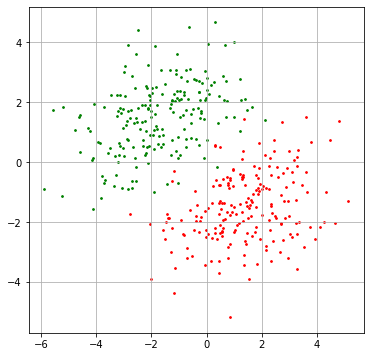

In [2]:
#3, EKF--Generate synthetic data

#The input of the observation equation
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
alpha=1.5
m1=np.array([-alpha,alpha])
m2=np.array([alpha,-alpha])
C1=np.array([[2,1],[1,2]], np.float32)
C2=np.array([[2,1],[1,2]], np.float32)

N=200
A=np.linalg.cholesky(C1)
Xs1=np.random.randn(N,2)
Xs2=np.random.randn(N,2)
Ys1=Xs1 @ A+m1
Ys2=Xs2 @ A+m2

plt.scatter(Ys1[:,0],Ys1[:,1],s=3,c='g')
plt.scatter(Ys2[:,0],Ys2[:,1],s=3,c='r')
plt.grid(True)  

#The output of the observation equation
def sigmoid(th,x):  
    return 1 / (1 + np.exp(-th.T @ x))


th=np.linalg.inv(C1) @ (m2-m1) #Bishop PRML 4.2.1 Continuous inputs
p_Ys1=[]
for i in range(N):
    p_Ys1.append(sigmoid(th,Ys1[i,:]))    
p_Ys2=[]
for i in range(N):
    p_Ys2.append(sigmoid(th,Ys2[i,:]))    

# print(min(p_Ys1),sum(p_Ys1)/N,max(p_Ys1))    
# print(min(p_Ys2),sum(p_Ys2)/N,max(p_Ys2))    

#The synthetic data
Ys=np.concatenate((Ys1, Ys2), axis=0)
# p_Ys=p_Ys1+p_Ys2 #without observation noise
noise = 0.01*np.random.randn(2*N)
p_Ys =[x + y for x, y in zip(p_Ys1+p_Ys2, noise)] #with observation noise

-0.0238803699414966 0.026135409312081827 -0.0004663589072139846
-2.62856227123799 30.044356756352332 0.5177073495725414


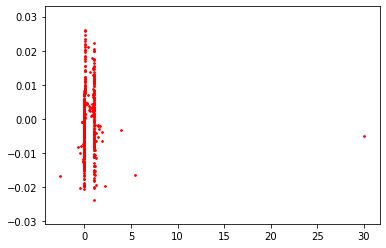

In [3]:
#Proportion of noise in the sigmoid
print(min(noise),max(noise),sum(noise)/len(noise))
test =[x/y for x, y in zip( noise,p_Ys)]
print(min(test),max(test),sum(test)/len(test))
plt.scatter(test,noise,s=3,c='r')

initial th_n1_n1: 
 [[-1.25481244]
 [ 0.71481028]]
initial P_n1_n1: 
 [[0.001 0.   ]
 [0.    0.001]]
R: 
 0.001249292312645119
Q: 
 [[0.001 0.   ]
 [0.    0.001]]
th: 
 [ 3.00000009 -3.00000009]
th_n_n: 
 [[ 2.94890233]
 [-3.01452932]]


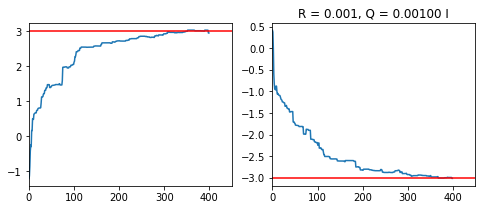

In [4]:
#3, Extended Kalman Filter Estimates of logistic function parameters

y=p_Ys

# Initialize
x = np.zeros((2,1)) #Return a 2×1 array, filled with zeros.

# th_n_n: estimate at time n using all data upto time n
# th_n_n1: estimate at time n using all data upto time n-1
th_n1_n1 = np.random.randn(2,1) #Return a 2×1 sample (or samples) from the “standard normal” distribution.
P_n1_n1 = 0.001*np.eye(2) #Return a 2×2 array with 1s on the diagonal and zeros elsewhere.
print('initial th_n1_n1: \n',th_n1_n1)
print('initial P_n1_n1: \n',P_n1_n1)

# Noise variances -- hyperparameters (to be tuned)
# Set measurement noise as fraction of data variance (first few samples)
# Guess for process noise
# R = 0 # if without observation noise
R = 0.2*np.std(noise[0:10]) #if with observation noise
beta = 0.001
Q = beta*np.eye(2) #Return a 2×2 array with betas on the diagonal and zeros elsewhere.
print('R: \n',R)
print('Q: \n',Q)

# Space to store and plot
th_conv = np.zeros([2, 2*N]) #Return a 2×N array, filled with zeros.
# First two estimates are initial guesses
th_conv[0,0] = th_n1_n1[0]
th_conv[0,1] = th_n1_n1[1]
th_conv[1,0] = th_n1_n1[0]
th_conv[1,1] = th_n1_n1[1]

# Kalman Iteration Loop (univariate observation, start from time step 2)
for n in range(2*N):
    # Input vector contains past values
    x[0] = Ys[n,0]
    x[1] = Ys[n,1]
    
    # Prediction of state and covariance
    th_n_n1 = th_n1_n1.copy()
    P_n_n1 = P_n1_n1 + Q # the Jacobian matrix is identity matrix here
    
    yh = sigmoid(th_n_n1,x) #scalar
    en = y[n] - yh #scalar
    #ePlot[n] = en
    
    # Kalman gain (kn) and innovation variance (den)
    #https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x
    #https://en.wikipedia.org/wiki/Extended_Kalman_filter
    H=(sigmoid(th_n_n1,x)*(1-sigmoid(th_n_n1,x)))* x.T #1×2  the Jacobian matrix is the derivative of sigmoid respect to theta
    den = H @ P_n_n1 @ H.T + R #scalar
    kn = P_n_n1 @ H.T / den #2×1
    
    # Posterior update
    th_n_n = th_n_n1 + kn * en
    P_n_n = (np.eye(2) - kn @ H) @ P_n_n1
    
    # Save
    th_conv[0,n] = th_n_n[0]
    th_conv[1,n] = th_n_n[1]
    
    # Remember for next step
    th_n1_n1 = th_n_n.copy()
    P_n1_n1 = P_n_n.copy()

print('th: \n',th)
print('th_n_n: \n',th_n_n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
ax[0].plot(th_conv[0])
ax[0].set_xlim(0,2*N+50)
ax[0].axhline(y=th[0], color='r')

ax[1].plot(th_conv[1])
ax[1].set_xlim(0,2*N+50)
ax[1].axhline(y=th[1], color='r')
ax[1].set_title("R = %4.3f, Q = %6.5f I"%(R, beta))
plt.savefig("C:\\Users\\zhoujie\\Desktop\\EKF.png")   

In [5]:
#4, online PCA
#CHAPTER 13 Using principal component analysis to simplify data, machine learning in action
# http://archive.ics.uci.edu/ml/datasets/SECOM
# http://archive.ics.uci.edu/ml/machine-learning-databases/secom/
    
import pandas as pd
dataMat=pd.read_csv("C:\\From Lenovo\\University of Southampton\\2, On Campus\\Lectures\\Semester 2\\\
COMP6247 Reinforcement and Online Learning\\Labs\\2, LabSheetKalmanParticle\\secom.data",index_col=False,delimiter=' ',header=None)
dataMat=dataMat.fillna(dataMat.mean())
print(dataMat.head())
print(dataMat.shape)

       0        1          2          3       4      5         6       7    \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

      8       9    ...       580         581     582     583     584      585  \
0  1.5005  0.0162  ...  0.005396   97.934373  0.5005  0.0118  0.0035   2.3630   
1  1.4966 -0.0005  ...  0.006000  208.204500  0.5019  0.0223  0.0055   4.4447   
2  1.4436  0.0041  ...  0.014800   82.860200  0.4958  0.0157  0.0039   3.1745   
3  1.4882 -0.0124  ...  0.004400   73.843200  0.4990  0.0103  0.0025   2.0544   
4  1.5031 -0.0031  ...  0.005396   97.934373  0.4800  0.4766  0.1045  99.3032   

        586       587       588         589 

In [103]:
from sklearn.decomposition import PCA
#By specifying  the # of principle components
pca1 = PCA(n_components=5)
principalComponents1 = pca1.fit_transform(dataMat)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5'])
# https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative
print(principalComponents1)
print(principalDf1)

[[-5183.89616507 -3022.64772377   688.38624272    57.92893139
    349.2805426 ]
 [-1866.69728394 -4021.63902468 -1505.57352582   199.23992422
   -640.23125616]
 [-3154.74165413 -3461.98581552 -1855.44207771  -153.33360816
   -139.53362243]
 ...
 [-3821.21714302  -157.30328822 -1198.46485098   -15.13555707
    479.52921478]
 [-4271.04023715 -1300.47276359   381.63452019   298.6473842
    757.62307294]
 [-3562.87329382 -3727.60719872  -418.43547367   -35.86509783
   -132.60920365]]
             pc 1         pc 2         pc 3         pc 4         pc 5
0    -5183.896165 -3022.647724   688.386243    57.928931   349.280543
1    -1866.697284 -4021.639025 -1505.573526   199.239924  -640.231256
2    -3154.741654 -3461.985816 -1855.442078  -153.333608  -139.533622
3    -1983.433550  -598.035804 -1509.102872  -571.943074   286.113765
4    -3926.094099 -2343.841985   134.619458  -187.949330  -134.322803
...           ...          ...          ...          ...          ...
1562 -4535.542481  3372.8

In [104]:
#choose the minimum number of principal components such that 92% of the variance is retained.
pca2 = PCA(.92)
principalComponents2 = pca2.fit_transform(dataMat)
# principalDf2 = pd.DataFrame(data = principalComponents2
#              , columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5'])
print(principalComponents2)
# print(principalDf2)

[[-5183.89616507 -3022.64772377   688.38624272]
 [-1866.69728394 -4021.63902468 -1505.57352582]
 [-3154.74165413 -3461.98581552 -1855.44207771]
 ...
 [-3821.21714302  -157.30328822 -1198.46485098]
 [-4271.04023715 -1300.47276359   381.63452019]
 [-3562.87329382 -3727.60719872  -418.43547367]]


In [10]:
import numpy as np
XFsquare=np.square(np.linalg.norm(dataMat, 'fro')) #the square of the frobenius norm of the dataframe
print(XFsquare)
xtsquare_max=np.square(dataMat).sum().max() #the maximum square of the norm of the features
print(xtsquare_max)
l_ceiling=XFsquare/xtsquare_max #the assumption of alg1 in the paper online PCA
print(l_ceiling)

491434509861.78754
122347065684.3361
4.016724938297438
